In [1]:
# いつもの
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

%time
np.random.seed(20160704)
tf.set_random_seed(20160704)

/Users/yamamotomasaomi/.pyenv/versions/anaconda3-5.1.0/envs/makuwo/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


Instructions for updating:
Use the retry module or similar alternatives.
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs


In [2]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
# 畳みこみフィルターの設定
num_filters1 = 16

# プレースホルダーの設定
x = tf.placeholder(tf.float32,[None, 784])
x_image = tf.reshape(x, [-1, 28, 28, 1])

W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 1, num_filters1],
                                         stddev = 0.1))
h_conv1 = tf.nn.conv2d(x_image, W_conv1,
                      strides = [1, 1, 1, 1], padding = 'SAME')
b_conv1 = tf.Variable(tf.constant(0.1, shape=[num_filters1]))
h_conv1_cutoff = tf.nn.relu(h_conv1 + b_conv1)
h_pool1 = tf.nn.max_pool(h_conv1_cutoff, ksize=[1, 2 , 2 , 1],
                         strides = [1, 2, 2, 1], padding = 'SAME')

In [4]:
num_filters2 = 32

W_conv2 = tf.Variable(tf.truncated_normal([5, 5, num_filters1, num_filters2],
                                           stddev = 0.1))
h_conv2 = tf.nn.conv2d(h_pool1, W_conv2,
                       strides=[1, 1, 1, 1], padding='SAME')
b_conv2 = tf.Variable(tf.constant(0.1, shape=[num_filters2]))

h_conv2_cutoff = tf.nn.relu(h_conv2 + b_conv2)

h_pool2 = tf.nn.max_pool(h_conv2_cutoff, ksize=[1, 2, 2, 1],
                         strides= [1, 2, 2, 1], padding = 'SAME')

In [5]:
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*num_filters2])

num_units1 = 7*7*num_filters2
num_units2 = 1024

w2 = tf.Variable(tf.truncated_normal([num_units1, num_units2]))
b2 = tf.Variable(tf.constant(0.1, shape=[num_units2]))
hidden2 = tf.nn.relu(tf.matmul(h_pool2_flat, w2) + b2)

keep_prob = tf.placeholder(tf.float32)
hidden2_drop = tf.nn.dropout(hidden2, keep_prob)

w0 = tf.Variable(tf.zeros([num_units2, 10]))
b0 = tf.Variable(tf.zeros([10]))
p = tf.nn.softmax(tf.matmul(hidden2_drop, w0) + b0)

In [6]:
t = tf.placeholder(tf.float32, [None, 10])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer().minimize(loss)
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [7]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
saver = tf.train.Saver()

In [15]:
i = 0
p_val, loss_vals, acc_vals = [], [], []
for _ in range (5000):
    i+=1
    batch_xs, batch_ts = mnist.train.next_batch(50) 
    sess.run(train_step,
             feed_dict={x:batch_xs, t: batch_ts, keep_prob:0.5})
    p_val.append(i)
    batch_t_xs, batch_t_ts = mnist.test.next_batch(50) 
    loss_val, acc_val = sess.run([loss,accuracy],feed_dict={x:batch_t_xs,t:batch_t_ts,keep_prob:1.0})
    loss_vals.append(loss_val)
    acc_vals.append(acc_val)
#     loss_val = np.sum(loss_vals)
#     acc_val = np.mean(acc_vals)
    if i % 500 == 0:
        %time print('Step: %d, Loss:%f, Accuracy: %f' 
                % (i, loss_val, acc_val))
#     if i == 5000:
#         %timeit print ('finish');
#         saver.save(sess, '/Users/yamamotomasaomi/Documents/GitHub/my_mechanic_studies/cnn_session_C', global_step=i)

IndentationError: unexpected indent (<ipython-input-15-356f8dd2f7fd>, line 17)

In [9]:
# !ls cnn_session*

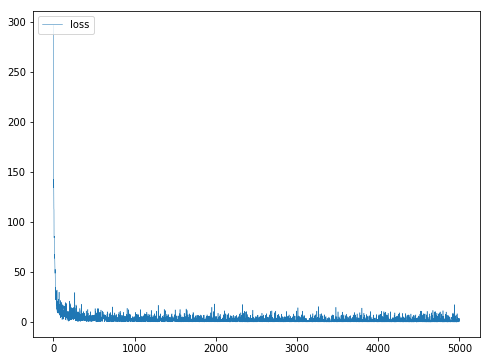

In [10]:
fig = plt.figure(figsize=(8,6))
subplot1 = fig.add_subplot(1,1,1)
subplot1.plot(p_val ,loss_vals,linewidth=0.5,label='loss')
subplot1.legend(loc='upper left')

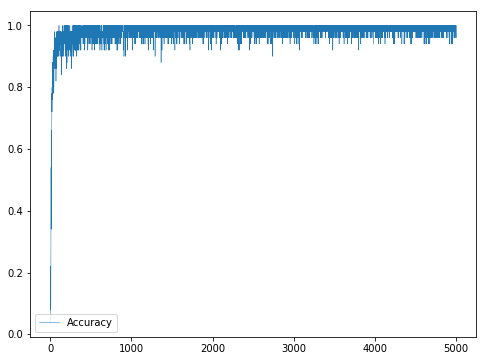

In [11]:
fig = plt.figure(figsize=(8,6))
subplot2 = fig.add_subplot(1,1,1)
subplot2.plot(p_val,acc_vals,linewidth=0.5,label='Accuracy')
subplot2.legend(loc='lower left')